In [307]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [308]:
# Reading the file and printing the first 5
df = pd.read_csv("../data/car_price_prediction.csv")
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


Data Cleaning and Exploratory

In [309]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 19237 rows , 18 columns.


In [310]:
# since the id column is not useful we can drop it 
df.drop(['ID'], axis=1,inplace=True)
print(f'Data after dropping col "ID" has  {df.shape[1]} columns.')

Data after dropping col "ID" has  17 columns.


In [311]:
# checking for the datatypes
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

Since the "Levy", "Engine volume", "Mileage" & "Cylinders" columns should contain int or float values not object we have to convert it first

In [312]:
print("Unique values in Levy\n",df['Levy'].unique())

Unique values in Levy
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784'

as we can see "Levy" has '-' values i.e at the 3rd position, we should dealing with non numerical data before converting

In [313]:
# Replace non-numeric values with NaN
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

df['Levy']

0        1399.0
1        1018.0
2           NaN
3         862.0
4         446.0
          ...  
19232       NaN
19233     831.0
19234     836.0
19235    1288.0
19236     753.0
Name: Levy, Length: 19237, dtype: float64

the next one is the "Cylinders" col that it should contain int values not float

In [314]:
df['Cylinders'] = df['Cylinders'].astype(int)
df['Cylinders']

0        6
1        6
2        4
3        4
4        4
        ..
19232    4
19233    4
19234    4
19235    4
19236    4
Name: Cylinders, Length: 19237, dtype: int64

we should also deal with "Engine volume" so that it should contain float values not object

In [315]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [316]:
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce') #non-numeric will be replaced with NaN
df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    NaN
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

the next one is to deal with "Mileage" col that it should contain int values not object

In [317]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [318]:
# Remove non-numeric characters and convert 'Mileage' to integers
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '')
df['Mileage']=df['Mileage'] .astype(int)
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

Checking for duplicated Values


In [319]:
num_duplicates = df.duplicated().sum()

print("Number of duplicated values:", num_duplicates)

Number of duplicated values: 3512


In [320]:
df.drop_duplicates(inplace=True)
print(f'Data after dropping duplicated values has {df.shape[0]} rows ') #rows-=313

Data after dropping duplicated values has 15725 rows 


Checking for NULL Values

<Axes: >

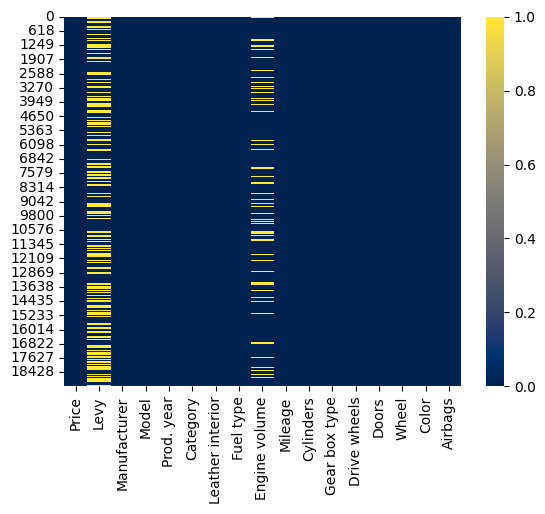

In [321]:
sns.heatmap(df.isnull(),cmap='cividis')

from this heatmap the NULL values are in the "Levy" col and "Engine volume" col so we should also handle these null values|

In [322]:
num_nulls_Levy=df["Levy"].isnull().sum()
print("Number of Null values in 'Levy' col is          :", num_nulls_Levy)

num_nulls_Engine=df["Engine volume"].isnull().sum()
print("Number of Null values in 'Engine volume' col is :", num_nulls_Engine)

Number of Null values in 'Levy' col is          : 5684
Number of Null values in 'Engine volume' col is : 1889


In [323]:
#  replace Null values in "Levy" with mean of "Levy" col
df['Levy'].fillna( df['Levy'].mean(), inplace=True)
df['Levy'] = df['Levy'].astype(int)# convert from float to int

#  replace Null values in "Engine volume" with mean of "Engine volume" col
df['Engine volume'].fillna( df['Engine volume'].mean(), inplace=True)

In [324]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [325]:
num_nulls=df.isnull().sum().sum()
print("number of Null values in Data:", num_nulls)

number of Null values in Data: 0


since our data is clean we can go to the detecting outliers
there for we should pick the possible column that may have outliers

In [326]:
df_setect_out=df[['Levy','Engine volume','Mileage','Airbags']]
df_setect_out

,Levy,Engine volume,Mileage,Airbags
0,1399,3.500000,186005,12
1,1018,3.000000,192000,8
2,879,1.300000,200000,2
3,862,2.500000,168966,0
4,446,1.300000,91901,4
...,...,...,...,...
19230,645,1.800000,307325,12
19232,879,2.206404,300000,5
19233,831,2.400000,161600,8
19234,836,2.000000,116365,4


In [327]:
outlier_cols = []

for column in df_setect_out.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers based on the IQR
    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)
    
    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

# Print columns with outliers
print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Levy', 'Engine volume', 'Mileage']


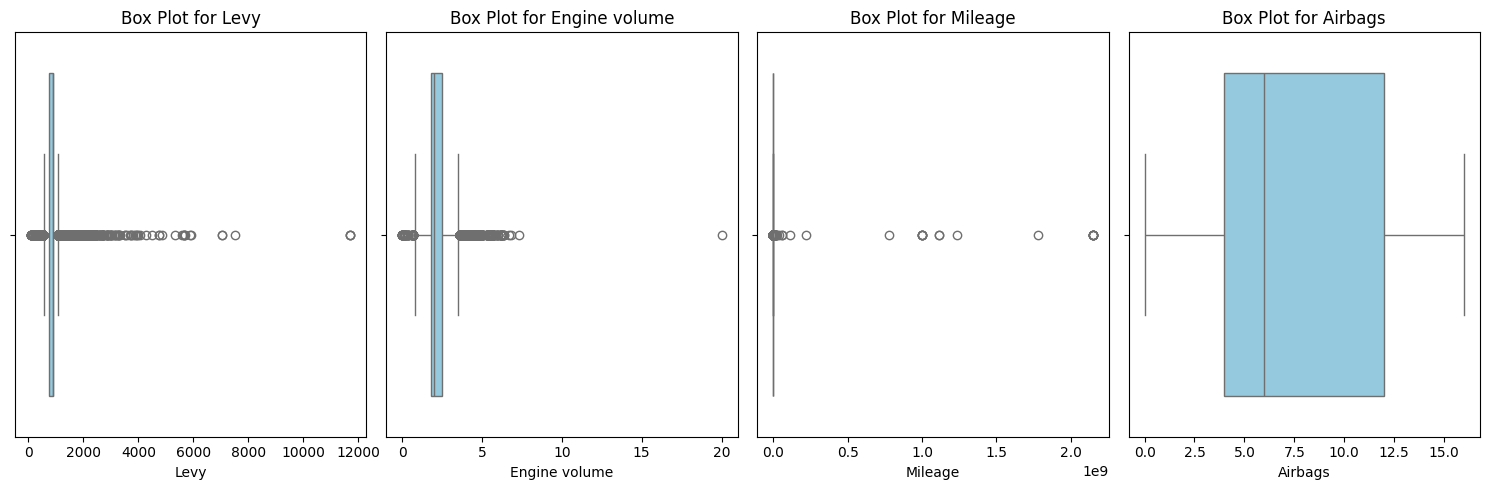

In [328]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(15, 5))

# Create box plots for each column
for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

The box plots for Levy, Engine volume, Mileage, and Cylinders indicate the presence of potential outliers as there are data points extending beyond the whiskers. However, the box plot for Airbags shows a relatively clean distribution with no significant outliers.

In [329]:
# Loop through the columns with outliers
for column in df_setect_out.columns:
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df_setect_out[column] = df_setect_out[column].clip(lower=lower_bound, upper=upper_bound)

# Check the updated values
print(df_setect_out.describe())


               Levy  Engine volume        Mileage       Airbags
count  15725.000000   15725.000000   15725.000000  15725.000000
mean     835.736789       2.161424  130567.788045      6.543339
std      156.853489       0.603954   86330.630340      4.067728
min      546.500000       0.750000       0.000000      0.000000
25%      746.000000       1.800000   66575.000000      4.000000
50%      879.000000       2.000000  121000.000000      6.000000
75%      879.000000       2.500000  180000.000000     12.000000
max     1078.500000       3.550000  350137.500000     16.000000


In [330]:
# Apply the changes from df_setect_out back to df for the selected columns
df[df_setect_out.columns] = df_setect_out
df



,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1078.5,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.500000,186005.0,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.000000,192000.0,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,879.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.300000,200000.0,4,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.500000,168966.0,4,Automatic,4x4,04-May,Left wheel,White,0
4,11726,546.5,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.300000,91901.0,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.800000,307325.0,4,Automatic,Front,04-May,Left wheel,Silver,12
19232,8467,879.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.206404,300000.0,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.400000,161600.0,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.000000,116365.0,4,Automatic,Front,04-May,Left wheel,Grey,4


In [331]:
# Save the modified dataset to a CSV file
df.to_csv('../data/cleaned_car_price_dataset.csv', index=False)
